# Predicting Waterpoint Functionality in Tanzania: Data-Driven Insights for Sustainable Water Access

## Business understanding


### **Objective**  
The main goal of this project is to predict the **operational status** of waterpoints in Tanzania and categorize them into two groups:  
1. **Functional**: Fully operational and delivering water as intended.  
2. **Non-functional**: Not operational and unable to provide water.  

---

### **Importance of the Problem**  
1. **Optimized Resource Allocation**:  
   - By forecasting the condition of waterpoints, stakeholders such as the Tanzanian Ministry of Water and NGOs can prioritize maintenance and repairs effectively.  
2. **Enhanced Water Accessibility**:  
   - Keeping waterpoints functional ensures access to clean water for rural and urban communities, promoting public health and reducing waterborne illnesses.  
3. **Cost Efficiency**:  
   - Anticipating waterpoint failures helps avoid unnecessary expenses, redirecting resources to critical interventions.  
4. **Long-term Sustainability**:  
   - Identifying failure patterns aids in strategic planning for future waterpoint installations, increasing their lifespan and reliability.  

---

### **Key Stakeholders**  
1. **Government Entities**:  
   - The Tanzanian Ministry of Water, responsible for infrastructure management and policymaking.  
2. **Non-Governmental Organizations (NGOs)**:  
   - Organizations working to improve access to safe water in underserved areas.  
3. **Local Communities**:  
   - Direct users who benefit from operational waterpoints.  
4. **Funders and Donors**:  
   - Investors focused on the impact and sustainability of water infrastructure projects.  

---

### **Problem Description**  
The dataset includes a wide range of features, detailing physical attributes, installation specifics, geographical data, and usage patterns of waterpoints. These variables help address critical questions such as:  
1. What are the primary causes of waterpoint failure?  
2. Which regions are more prone to non-functional waterpoints?  
3. How do funding sources and management practices impact waterpoint durability?  
4. Does the construction year influence a waterpoint's operational status?  

---

### **Expected Outcomes**  
1. A machine learning model capable of accurately predicting waterpoint functionality.  
2. Identification of the key factors that influence waterpoint performance.  
3. Actionable insights and recommendations to support maintenance and repair efforts.  

---

### **Challenges to Address**  
1. **Data Quality Issues**:  
   - Missing or inconsistent data in critical variables (e.g., funder, construction year).  
2. **Class Imbalance**:  
   - A large proportion of functional waterpoints may make it difficult to predict less common classes.  
3. **Regional and Temporal Variability**:  
   - Different areas may face distinct challenges (e.g., climate, maintenance quality).  
4. **Model Interpretability**:  
   - Simplifying complex outputs for non-technical stakeholders.  

---

### **Key Deliverables**  
1. **Predictive Model**: A reliable algorithm to classify waterpoint status.  
2. **Feature Analysis Report**: Insights into the most significant factors influencing waterpoint performance.  
3. **Visualizations and Dashboards**: Tools to help stakeholders understand and act on the predictions and insights.

## Data Understanding

In [1]:
# Import necessary modules for data understanding
import pandas as pd
import numpy as np

In [2]:
# Load the datasets
data1 =pd.read_csv('Data/Train_predictors.csv')
data2 =pd.read_csv('Data/Train_labels.csv')
Test_data =pd.read_csv('Data/Test_predictors.csv')

# Merge data1 and data2 using the id as the refrence variable
Train_data_labels = pd.merge(data2,data1,how='left')


In [3]:
Train_data_labels.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
# Check info about the object variables in the data
Train_data_labels.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   status_group           59400 non-null  object
 1   date_recorded          59400 non-null  object
 2   funder                 55765 non-null  object
 3   installer              55745 non-null  object
 4   wpt_name               59400 non-null  object
 5   basin                  59400 non-null  object
 6   subvillage             59029 non-null  object
 7   region                 59400 non-null  object
 8   lga                    59400 non-null  object
 9   ward                   59400 non-null  object
 10  public_meeting         56066 non-null  object
 11  recorded_by            59400 non-null  object
 12  scheme_management      55523 non-null  object
 13  scheme_name            31234 non-null  object
 14  permit                 56344 non-null  object
 15  extraction_type    

In [5]:
# Check info 
Train_data_labels.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   gps_height         59400 non-null  int64  
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   num_private        59400 non-null  int64  
 6   region_code        59400 non-null  int64  
 7   district_code      59400 non-null  int64  
 8   population         59400 non-null  int64  
 9   construction_year  59400 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 5.0 MB


In [6]:
# Investigate the response variable
Train_data_labels.status_group.value_counts()


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

class imbalance present in the response variable 

In [7]:
# subset functional needs repair from the dataset
Train_data_labels=Train_data_labels.loc[Train_data_labels['status_group'] !='functional needs repair'].copy()

## Data Cleaning
- Check for missing values and imputing them
- Checking for duplicates
- Drop irrelevant columns
- Check for outliers and handling them in the data



In [8]:
# Import modules to use for data cleaning
import seaborn as sns
import matplotlib.pyplot as plt

### 1). Missing values

In [9]:
# Check for missing values
missing_val =Train_data_labels.isna().sum()
missing_val[missing_val>0]

funder                3198
installer             3215
subvillage             370
public_meeting        3178
scheme_management     3654
scheme_name          26162
permit                2756
dtype: int64

Most of the columns with missing values are objects. For columns with more than 20% missing values we will drop otherwise replace with value `mising`.

### 2). Duplicates

In [10]:
# Check for duplicates
Train_data_labels.duplicated().sum()


0

The Tanzania water pumps dataset does not contain duplicated data

In [11]:
Train_data_labels.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

### 3). Dropping Irrelevant columns

In [12]:
# Drop Columns 
columns_drop = ['id','scheme_name','num_private','subvillage','lga','ward','recorded_by','scheme_name',
                'construction_year','extraction_type','extraction_type_group','management','payment_type','quality_group',
                'quantity_group','source', 'source_type','waterpoint_type']

new_data = Train_data_labels.drop(columns=columns_drop).copy()


For the purpose of interpretability of the model and following the principle of pharsimony. I chose to drop the above columns based on the following reasons:
* Columns that had been repeated but with different column names
* Categorical variable that had many distinct values in our data
* Columns with higher number of rows with missing values 

### 4). Imputing missing values

In [13]:
# Performing data imputation to replace missing values
missing_val =new_data.isna().sum()
missing_val[missing_val>0]


funder               3198
installer            3215
public_meeting       3178
scheme_management    3654
permit               2756
dtype: int64

In [14]:
new_data.fillna("missing",inplace=True)
new_data.isna().sum()

status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
scheme_management        0
permit                   0
extraction_type_class    0
management_group         0
payment                  0
water_quality            0
quantity                 0
source_class             0
waterpoint_type_group    0
dtype: int64

### 5). Investigating outliers

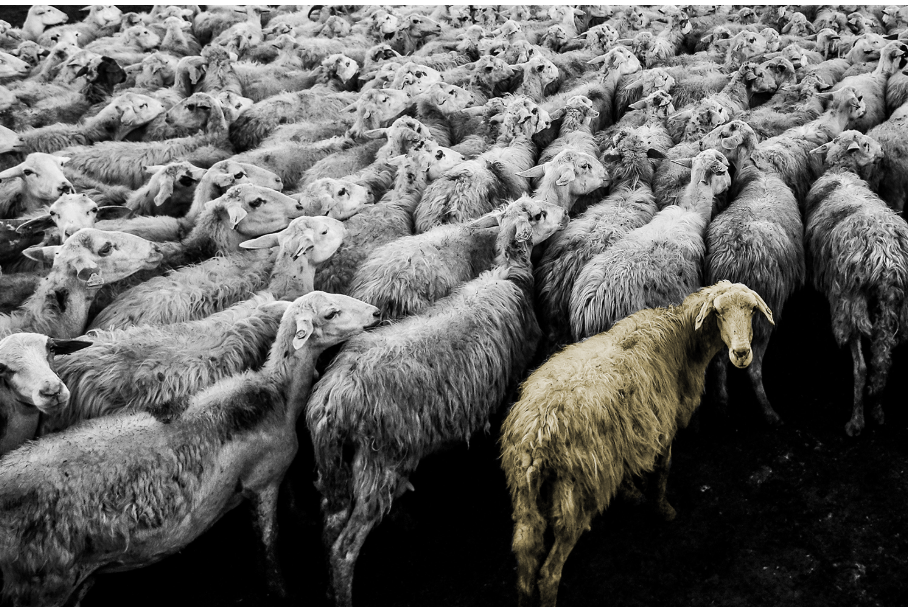

In [15]:
# ....Investigate outliers
new_data.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 0 to 59399
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amount_tsh     55083 non-null  float64
 1   gps_height     55083 non-null  int64  
 2   longitude      55083 non-null  float64
 3   latitude       55083 non-null  float64
 4   region_code    55083 non-null  int64  
 5   district_code  55083 non-null  int64  
 6   population     55083 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 3.4 MB


<AxesSubplot:xlabel='population', ylabel='Count'>

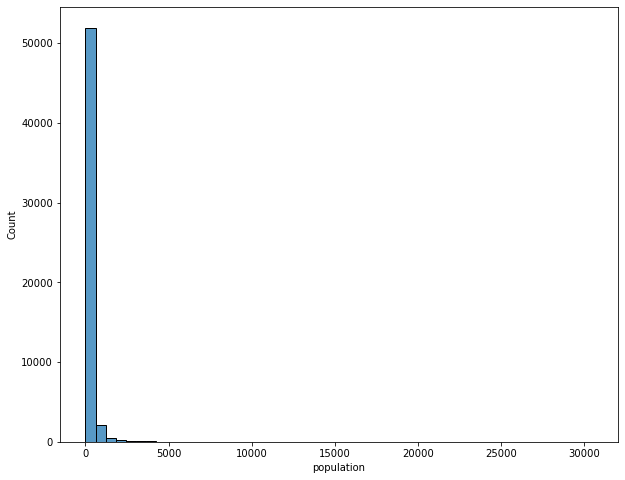

In [16]:
numeric_data = new_data.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.histplot(numeric_data,x='population',bins=50)

## Exploratory Data Analysis


For this section we will try and be one with the data🙏🏿.By experimenting different statistical tests and techniques we aim to get a deeper understanding of the data as well as insights that we will use for modelling. To do so let's summon the greatest explorer of our time...








- Normalize/Standardize the data
- Validate data accuracy (Making sure our data aligns with real-world scenario)


In [17]:
# Import helper functions to help visualize our data
from functions import plot_category

### 1). Univariate Analysis

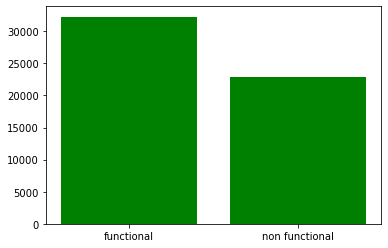

In [18]:
# Plotting the response variable 
res =new_data.status_group.value_counts()
plt.bar(x=res.index,height=res.values,color='green');


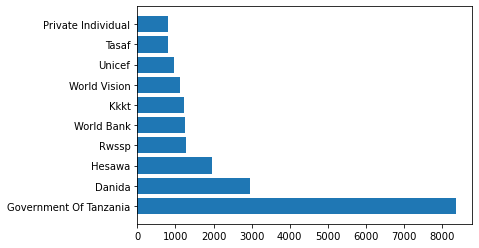

In [19]:
# Investigate the top ten funders
cat_plot =new_data.funder.value_counts(ascending=False).drop(labels='missing').head(10)
cat_plot
plt.barh(y=cat_plot.index,width=cat_plot.values);


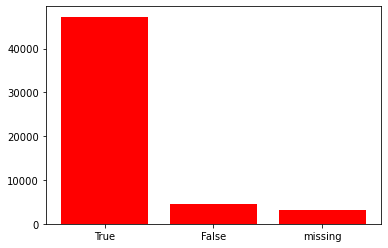

In [20]:
# Investigate Public meetings
meet =new_data.public_meeting.value_counts()
plt.bar(x=[str(x) for x in meet.index],height=meet.values,color='red');


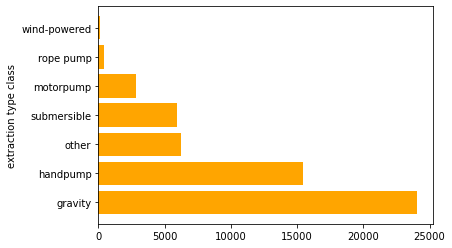

In [21]:
# Plot the extraction_type class
extr = new_data.extraction_type_class.value_counts()

plt.barh(y=extr.index,width=extr.values,color ='orange')
plt.ylabel('extraction type class');

### 2).Bivariate Visualization

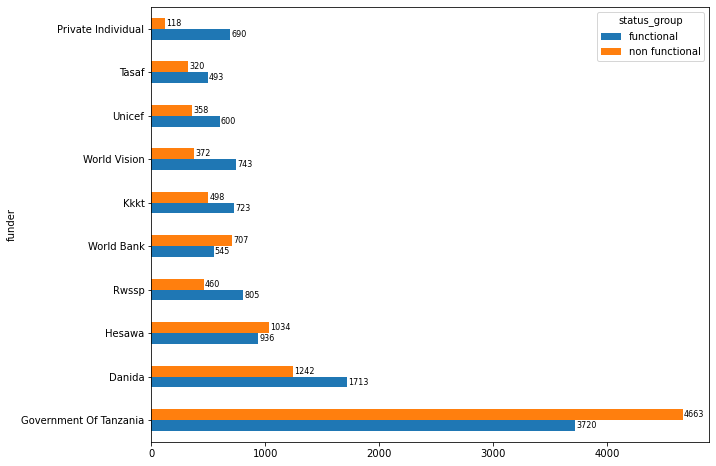

In [22]:
# since we have alot of levels in the categorical variable funder
# filtering for the top ten funders in the data could aid in visualizing
rows_filter=list(cat_plot.index) # create a list of funders we want to keep
plot_data=new_data.apply(lambda row:row[new_data['funder'].isin(rows_filter)])


crosstab_data =pd.crosstab(plot_data['funder'],plot_data['status_group'])

# Sort funders by the total number of water points
crosstab_data['Total'] = crosstab_data.sum(axis=1)
crosstab_data = crosstab_data.sort_values(by='Total', ascending=False).drop(columns=['Total'])


ax=crosstab_data.plot(kind='barh',stacked=False,figsize=(10,8));

# Add labels to the bars
# Manually add labels to the bars
for i, container in enumerate(ax.patches):
    # Each bar has a width corresponding to its value
    value = container.get_width()  # Bar value
    # Position the label
    ax.text(value + 10, container.get_y() + container.get_height() / 2,  # Slightly offset from the bar edge
            f'{int(value)}', va='center', fontsize=8)


In [23]:
# chi-square test
from scipy import stats

crosstab= pd.crosstab(plot_data['funder'],plot_data['status_group'])
print(stats.chi2_contingency(crosstab))

(902.8940071619397, 1.472005828590181e-188, 9, array([[1562.70202507, 1392.29797493],
       [4433.20848602, 3949.79151398],
       [1041.80135005,  928.19864995],
       [ 645.70530376,  575.29469624],
       [ 427.29720347,  380.70279653],
       [ 668.97396336,  596.02603664],
       [ 429.94136933,  383.05863067],
       [ 506.62217936,  451.37782064],
       [ 662.09913211,  589.90086789],
       [ 589.64898746,  525.35101254]]))


- The very high Chi-square statistic (902.8940071619397) and extremely small p-value(1.472005828590181e-188) and a degree of freedom of 9 suggest a strong association between the two categorical variables funder and status group.

- The largest contributors to the Chi-square statistic are likely Government of Tanzania, DANIDA, and Private Individual, given their high absolute counts and discrepancies between functional and non-functional water points.

 **Insights:** 
- Funders like Government of Tanzania and HESAWA may require further analysis to understand why their non-functional water points are so high despite large investments.
- Private Individuals might benefit from technical or financial support to improve their success rate in maintaining functional water points.
- Focus on funders with a higher proportion of functional water points (e.g., DANIDA ) could offer insights into best practices.



In [24]:
#Performing a chi-square test  Public meeting and Status group
crosstab2 = pd.crosstab(new_data['status_group'],new_data['public_meeting'])
print(stats.chi2_contingency(crosstab2))

(337.2364452458683, 5.8889296543293905e-74, 2, array([[ 2701.57338925, 27696.25162028,  1861.17499047],
       [ 1911.42661075, 19595.74837972,  1316.82500953]]))


**Chi-square Statistic: `337.236`**

- This indicates the overall difference between observed and expected frequencies. Larger values suggest a stronger association between the variables (in this case, public_meeting and status_group).

**P-value: `5.88e-74`**

- This is extremely small (practically 0), meaning there is a statistically significant association between whether a public meeting was held (public_meeting) and the functionality of the water point (status_group).

In [25]:
crosstab3 = pd.crosstab(new_data['status_group'],new_data['extraction_type_class'])
crosstab3

stats.chi2_contingency(crosstab3)

(6091.882188033732,
 0.0,
 6,
 array([[14101.70943848,  9054.63389794,  1668.49828441,  3645.04504112,
           254.16927183,  3470.52328305,    64.42078318],
        [ 9977.29056152,  6406.36610206,  1180.50171559,  2578.95495888,
           179.83072817,  2455.47671695,    45.57921682]]))

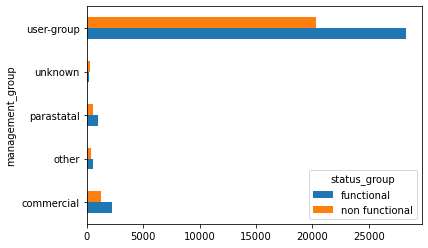

In [26]:
crosstab4 = pd.crosstab(new_data['management_group'],new_data['status_group'])
crosstab4.plot(kind='barh',stacked=False);

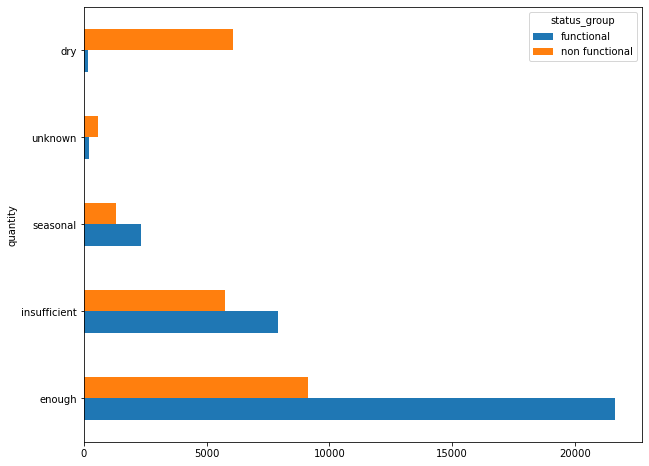

In [27]:
crosstab5 = pd.crosstab(new_data['quantity'],new_data['status_group'])
crosstab5.sort_values(by='functional',ascending=False).plot(kind='barh',stacked=False,figsize=(10,8));

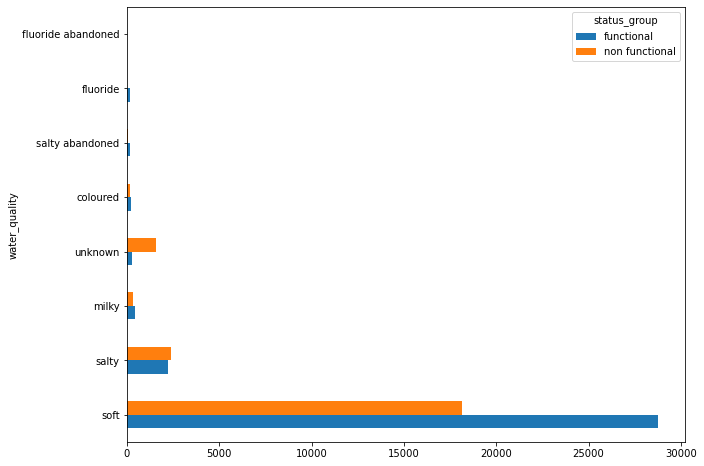

In [28]:
crosstab6 =pd.crosstab(new_data['water_quality'],new_data['status_group'])
crosstab6.sort_values(by='functional',ascending=False).plot(kind='barh',stacked=False,figsize=(10,8));

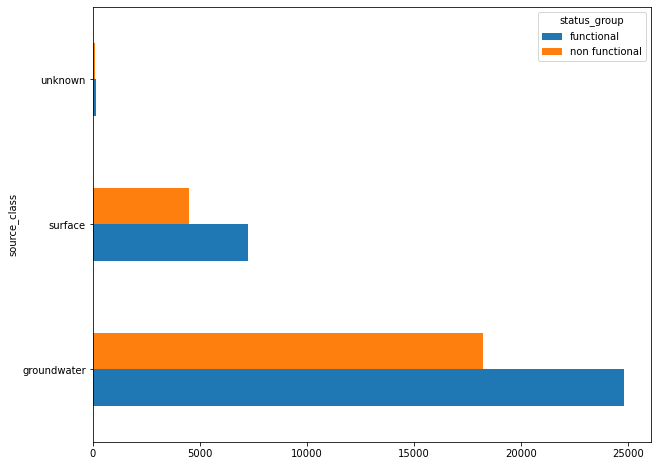

In [29]:
crosstab7=pd.crosstab(new_data['source_class'],new_data['status_group'])
crosstab7.sort_values(by='functional',ascending=False).plot(kind='barh',stacked=False,figsize=(10,8));

(5768.458410071031,
 0.0,
 5,
 array([[6.67633571e+01, 4.72366429e+01],
        [1.85748544e+04, 1.31421456e+04],
        [4.09950438e+00, 2.90049562e+00],
        [9.63910609e+03, 6.81989391e+03],
        [4.09364795e+02, 2.89635205e+02],
        [3.56481188e+03, 2.52218812e+03]]))

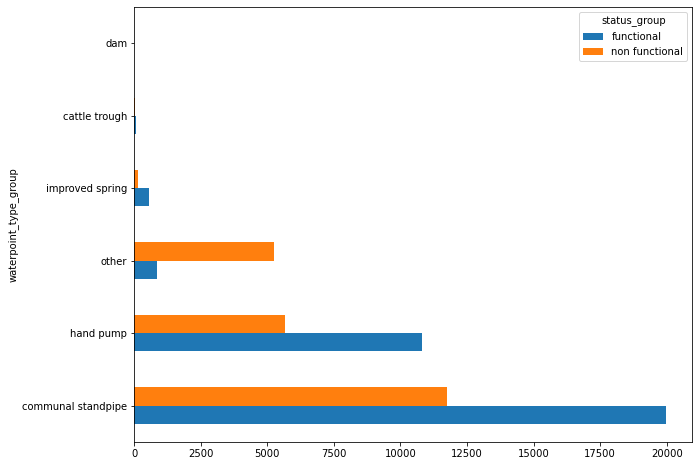

In [30]:
crosstab8=pd.crosstab(new_data['waterpoint_type_group'],new_data['status_group'])
crosstab8.sort_values(by='functional',ascending=False).plot(kind='barh',stacked=False,figsize=(10,8));
stats.chi2_contingency(crosstab8)

<AxesSubplot:>

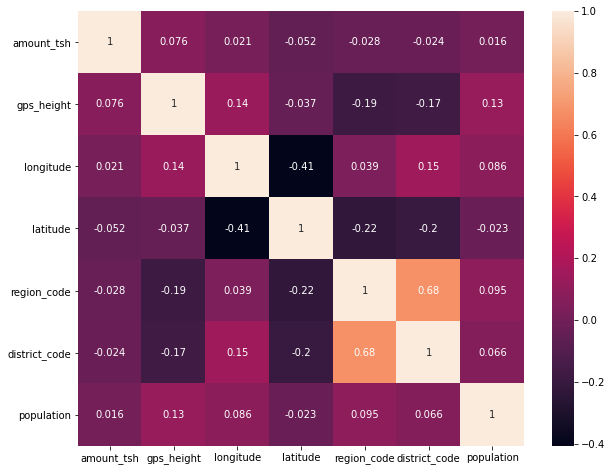

In [31]:
corr_data=numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_data,annot=True)

## Modelling🤖🚀

In [32]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,plot_roc_curve,auc,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
# from functions import OneShotEncoding # Helper function
from sklearn.linear_model import LogisticRegression

### Pre-process data
- We want to separate the objects from float/numbers
- Standardise the numeric columns 
- Perfom one hot encoding 
- Merge the two datasets
- Split into train and test data


#### 1). Standardise the numerical columns

In [33]:
num_data=new_data.loc[:,['amount_tsh','gps_height','population']]

# Instantiate standardizer
scaler =StandardScaler()

# Fit on the data
num_data=pd.DataFrame(scaler.fit_transform(num_data),columns=num_data.columns)
num_data.head()

,amount_tsh,gps_height,population
0,1.852191,1.031757,-0.150280
1,-0.104905,1.044680,0.210205
2,-0.096750,0.020841,0.146962
3,-0.104905,-0.586570,-0.257793
4,-0.104905,-0.964227,-0.380062


#### 2).Perfome one hot encoding 

In [34]:
obj_col = ['permit','extraction_type_class', 'management_group', 'payment', 'water_quality',
            'quantity', 'source_class', 'public_meeting','waterpoint_type_group','basin']

obj_data =new_data.loc[:,obj_col]

encoded_data =pd.get_dummies(obj_data,drop_first=True)
encoded_data.head()
encoded_data.index =num_data.index # make sure the index align

#### 3). Merge the datasets

In [35]:
Final_data =pd.merge(num_data,encoded_data,how='left',left_index=True,right_index=True)

In [36]:
# Define response variable
Y=new_data.status_group.map({'functional':0,'non functional':1})

#### 4). Split the Train and Test data

In [37]:
 
X_train,X_test,y_train,y_test = train_test_split(Final_data,Y,test_size=0.2,random_state=42)


### Logistic Regression

In [38]:
# Fit a logistic model
Model = LogisticRegression(max_iter=1000)
Model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Perform cross validation of the model
scores = cross_val_score(Model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.77444974 0.77966871 0.77036533 0.77240753 0.77626503 0.78193783
 0.76872447 0.77371766 0.76554698 0.76781661]


In [40]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.765546981389015, 0.773089988784195, 0.7819378261856138)

So the range of our accuracy is between 0.76 to 0.78 but generally 0.77 on average.

In [41]:
y_pred=Model.predict(X_test)
f1score =f1_score(y_test,y_pred)
accuracy =accuracy_score(y_test,y_pred)
print("F1-score: {:.2f}%".format(f1score * 100))

F1-score: 67.15%


In [42]:
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)

0.5610139075818753

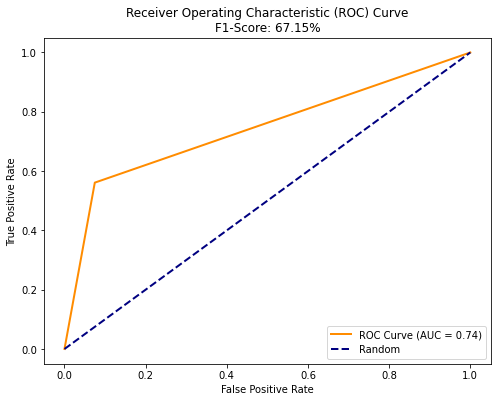

In [43]:
def plot_roc(y_test,y_pred,f1_score):    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred )
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
            label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve\nF1-Score: {:.2f}%'.format(
        f1_score * 100))
    plt.legend(loc="lower right")
    plt.show()
plot_roc(y_test,y_pred,f1score)

In [44]:
classes = list(new_data.status_group.unique())

from functions import plot_confusion_matrix

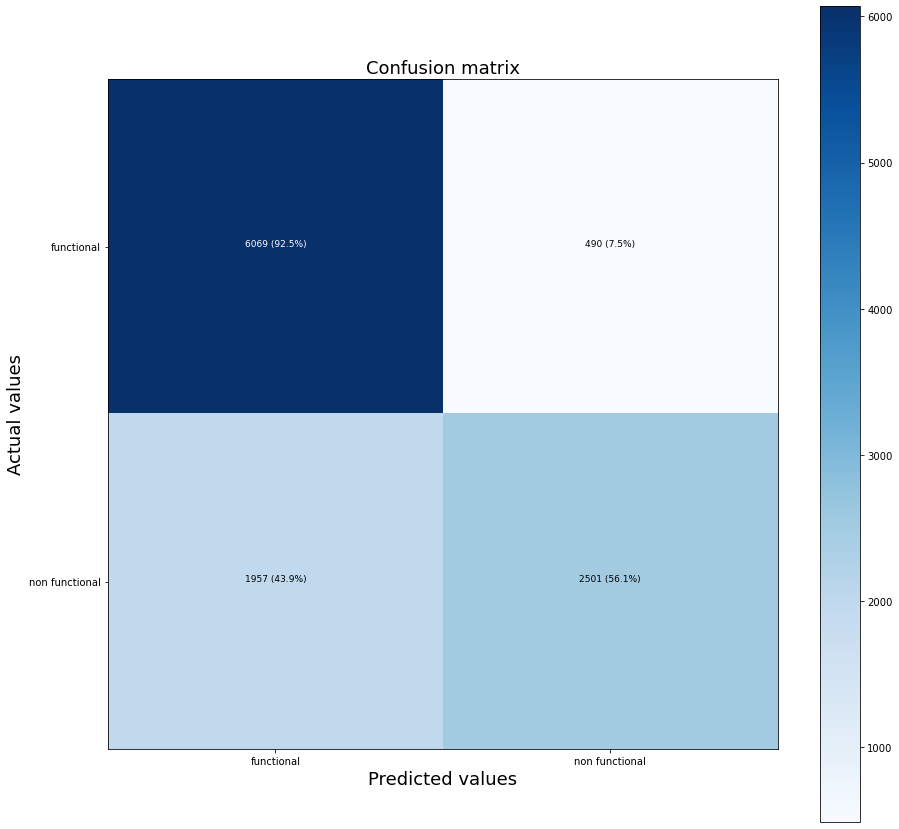

In [45]:
plot_confusion_matrix(y_pred,y_test,classes=classes)

In [46]:
y_train.value_counts()

0    25700
1    18366
Name: status_group, dtype: int64

In [47]:
y_test.value_counts()

0    6559
1    4458
Name: status_group, dtype: int64

#### Addressing Class Imbalance

In [48]:
from imblearn.combine import SMOTEENN # Address outliers
from imblearn.over_sampling import SMOTENC # When data has categorical features


In [49]:
y_train.value_counts()

0    25700
1    18366
Name: status_group, dtype: int64

##### 1. SMOTEENN

In [50]:
smote_enn =SMOTEENN()
X_resample , y_resample =smote_enn.fit_resample(X_train,y_train)
y_resample.value_counts()

1    15982
0    15776
Name: status_group, dtype: int64

In [51]:
# Fit a model on the resampled data
Smotenn_model = LogisticRegression(max_iter=1000,random_state=42)
Smotenn_model.fit(X_resample,y_resample)

# Get the F1-score 
y_pred=Smotenn_model.predict(X_test)
f1score =f1_score(y_test,y_pred)
accuracy =accuracy_score(y_test,y_pred)
print("F1-score: {:.2f}%".format(f1score * 100))

F1-score: 67.57%


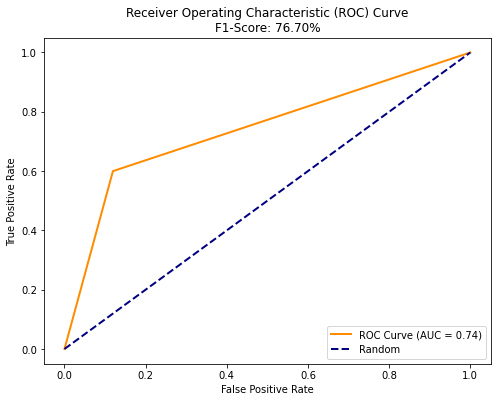

In [52]:
plot_roc(y_test,y_pred,accuracy)

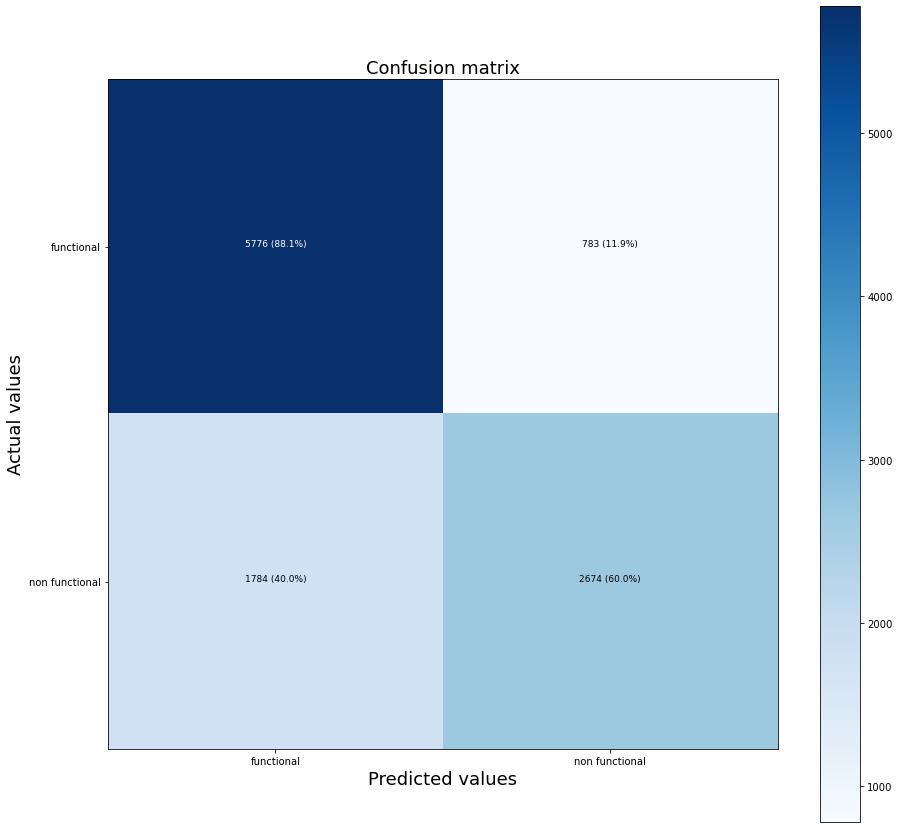

In [53]:
plot_confusion_matrix(y_pred,y_test,classes=classes)

##### 2. SMOTENC

In [54]:
# Indicate which features are categorical
categorical_frts = list(range(3,49))

# Initialize SMOTENC specifying which features are categorical
smote_nc = SMOTENC(categorical_features=categorical_frts, random_state=42)

# Perform the resampling
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

y_resampled.value_counts()

1    25700
0    25700
Name: status_group, dtype: int64

In [55]:
# Fit a model on the resampled data
Smotecn_model = LogisticRegression(max_iter=1000,random_state=42)
Smotecn_model.fit(X_resampled,y_resampled)

# Get the F1-score 
y_pred=Smotenn_model.predict(X_test)
f1score =f1_score(y_test,y_pred)
accuracy =accuracy_score(y_test,y_pred)
print("F1-score: {:.2f}%".format(f1score * 100))

F1-score: 67.57%


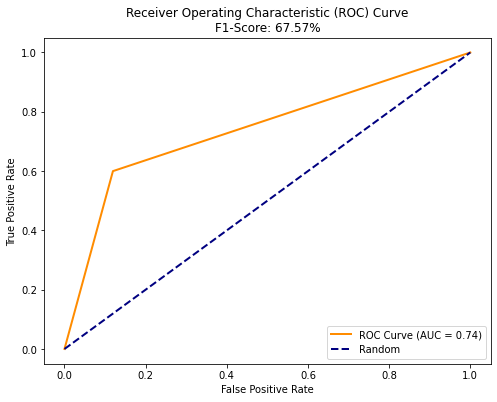

In [56]:
plot_roc(y_test,y_pred,f1score)

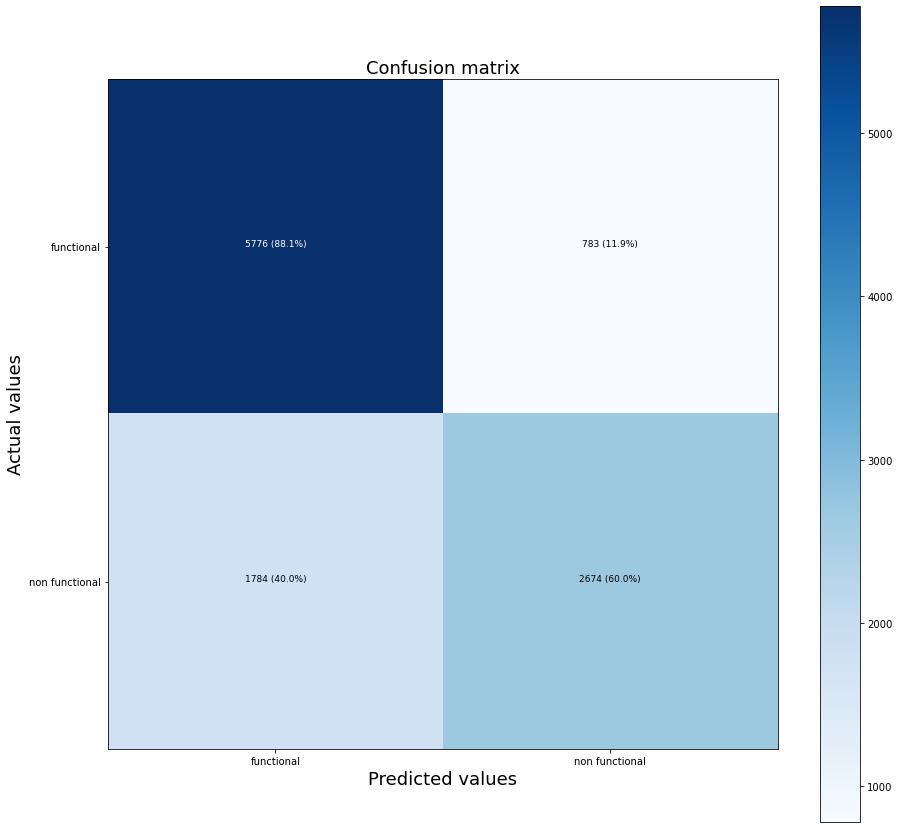

In [57]:
plot_confusion_matrix(y_pred,y_test,classes=classes)

#### Fine Tuning 

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# Fine tuning the model with the highest f1-score
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga']
}
]

In [60]:

clf_CV = GridSearchCV(Smotecn_model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf_CV

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [61]:
# # Get the best estimators
# best_clf = clf_CV.fit(X_resampled,y_resampled)
# best_clf.best_estimator_

In [63]:
# Y_preds =best_clf.predict(X_test)
# f1_score(y_true=y_test,y_pred=Y_preds)

In [65]:
# plot_confusion_matrix(y_preds=Y_preds,y_test=y_test,classes=classes)

### Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report

#### 1.) Training with Gini index

In [67]:
def train_using_gini(X_train,y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=10, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [68]:
Model_tree =train_using_gini(X_train=X_resampled,y_train=y_resampled)

# Predict on the test data
y_pred =Model_tree.predict(X_test)
f1score = f1_score(y_true=y_test,y_pred=y_pred)
# Evaluate the model
print('Accuracy_score :',accuracy_score(y_true=y_test,y_pred=y_pred))
print('F1_score :',f1_score(y_true=y_test,y_pred=y_pred))

Accuracy_score : 0.7939547971317056
F1_score : 0.722154222766218


In [69]:
y_predd = Model_tree.predict(X_resampled)
accuracy_score(y_true=y_resampled,y_pred=y_predd)

0.7866536964980545

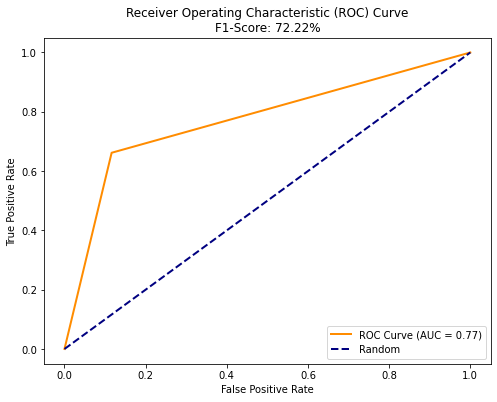

In [70]:
plot_roc(y_test,y_pred,f1score)

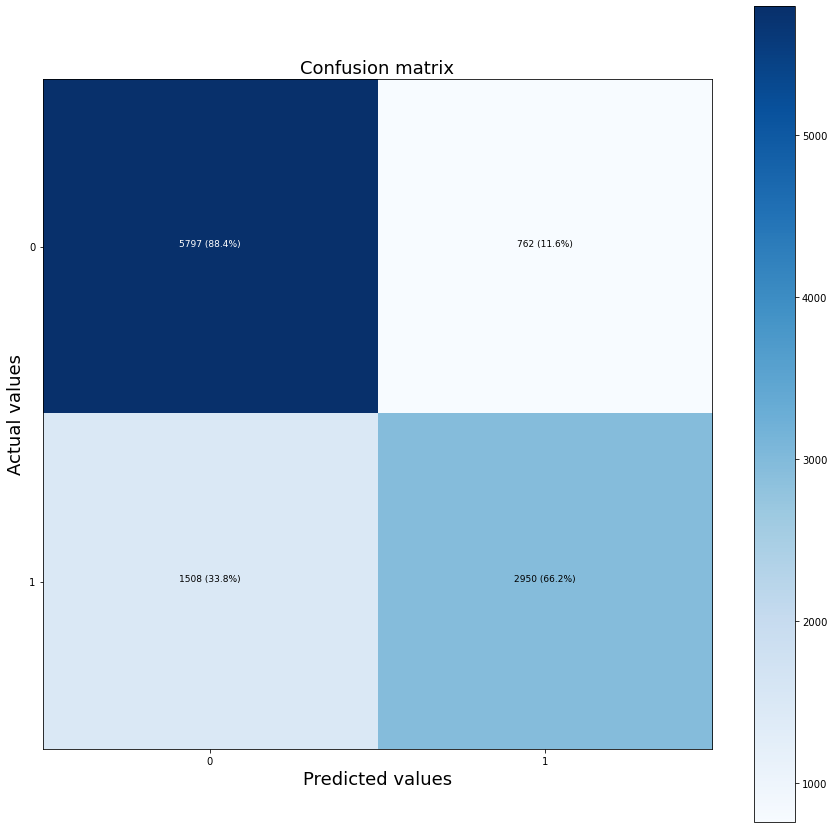

In [71]:
plot_confusion_matrix(y_test=y_test,y_preds=y_pred)

In [72]:
print(classification_report(y_test, y_pred,target_names=classes))

                precision    recall  f1-score   support

    functional       0.79      0.88      0.84      6559
non functional       0.79      0.66      0.72      4458

      accuracy                           0.79     11017
     macro avg       0.79      0.77      0.78     11017
  weighted avg       0.79      0.79      0.79     11017



#### 2). Training with entropy

In [73]:
def train_using_entropy(X_train,  y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=10, min_samples_leaf=10)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [74]:
Model_tree_ent =train_using_entropy(X_train=X_resampled,y_train=y_resampled)

# Predict on the test data
y_pred =Model_tree_ent.predict(X_test)
# Evaluate the model
f1score =f1_score(y_true=y_test,y_pred=y_pred)
print('Accuracy_score :',accuracy_score(y_true=y_test,y_pred=y_pred))
print('F1_score :',f1_score(y_true=y_test,y_pred=y_pred))

Accuracy_score : 0.7924117273304893
F1_score : 0.719833394585324


In [75]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

In [76]:
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

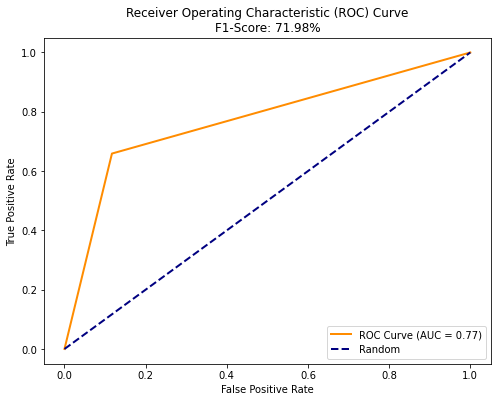

In [77]:
#Plot entropy tree

plot_roc(y_test,y_pred,f1score)

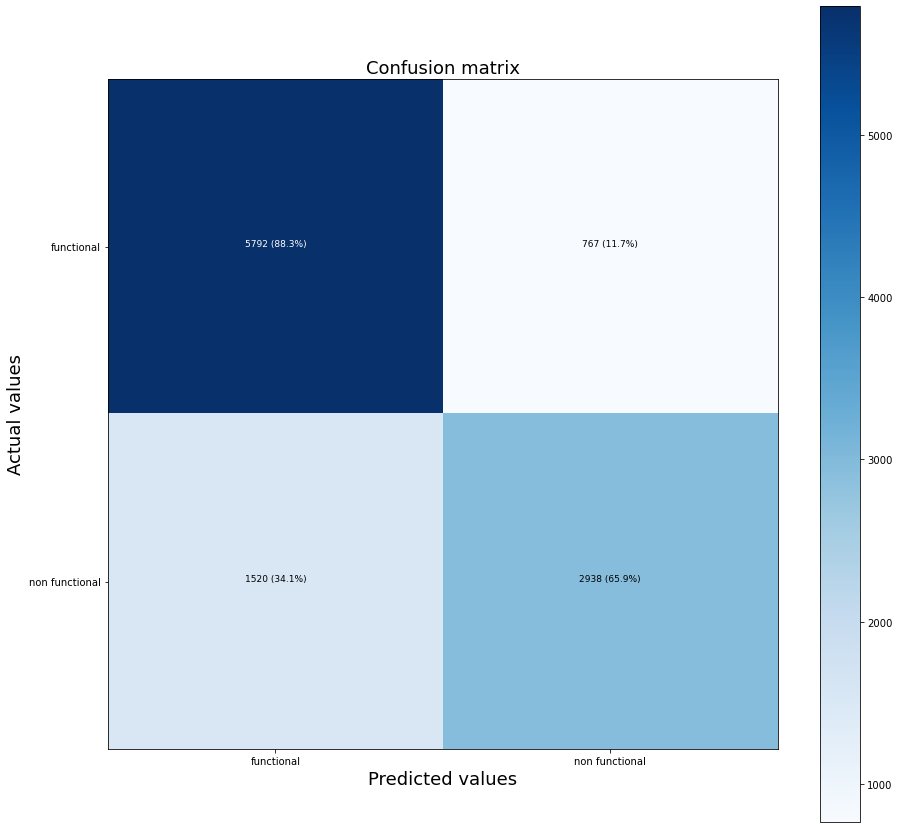

In [78]:
plot_confusion_matrix(y_preds=y_pred,y_test=y_test,classes=classes)

In [79]:
print(classification_report(y_test, y_pred,target_names=classes))

                precision    recall  f1-score   support

    functional       0.79      0.88      0.84      6559
non functional       0.79      0.66      0.72      4458

      accuracy                           0.79     11017
     macro avg       0.79      0.77      0.78     11017
  weighted avg       0.79      0.79      0.79     11017

